# Data Loading

In [3]:
import pandas as pd

# Load the dataset
file_path = 'Dataset/train.csv'
df = pd.read_csv(file_path)

# view the dataset
print(df.head())


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


# Data Preprocessing

In [4]:
#check missing values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# drop rows with missing values in other columns
df.dropna(inplace=True)

In [6]:
df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

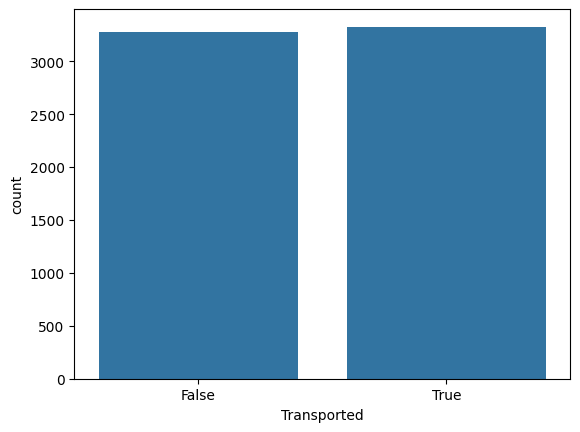

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# checking distribution
sns.countplot(x='Transported', data=df)
plt.show()

In [10]:
#drop irrelevant columns
df = df.drop(['Name'], axis=1)

# Convert categorical variables to numerical

Since Machine learning algorithms require numerical inputs we need to convert the categorical variables into numerical

In [15]:
from sklearn.preprocessing import StandardScaler

# categorical variables to numerical
df = pd.get_dummies(df, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'])

numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Model Selection & Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# target(y) and features(X)
X = df.drop(columns=['Transported'])
y = df['Transported']

# split the data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train with Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

# model training with RF
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

# RF model evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# classification report
print('\nClassification Report:')
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.8071104387291982

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.82      0.81       653
        True       0.82      0.80      0.81       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



RF Model Visualization

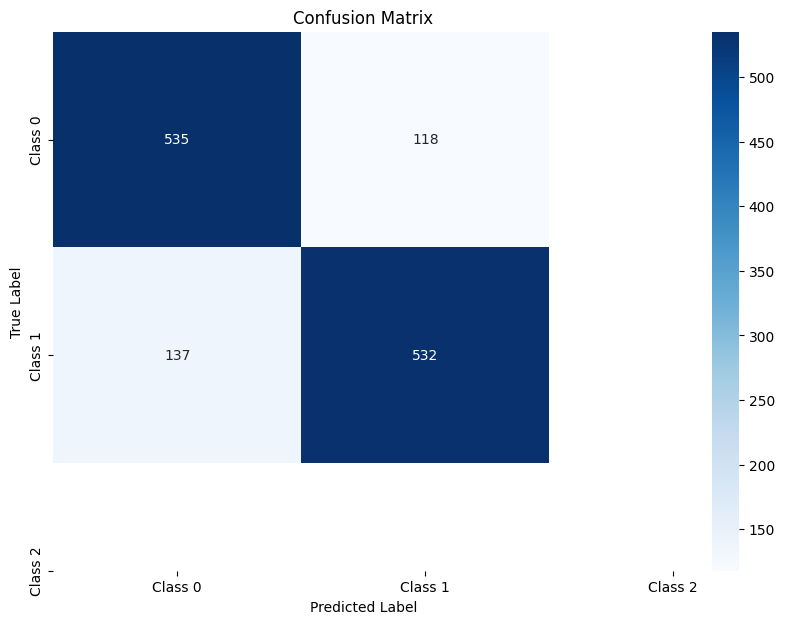

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


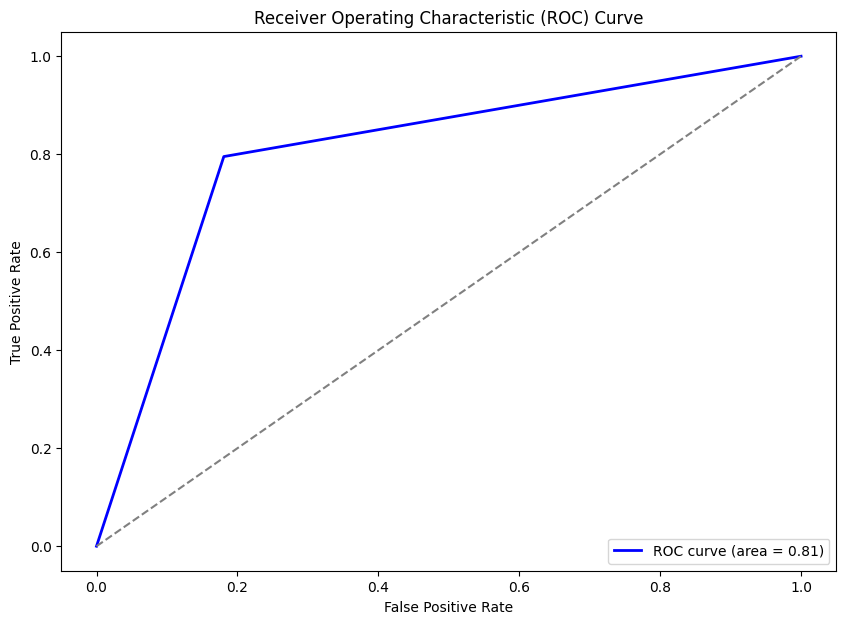

In [19]:
from sklearn.metrics import roc_curve, auc

# ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, rf_y_pred)
roc_auc = auc(fpr, tpr)

# plot
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [20]:
import warnings

warnings.filterwarnings('ignore')

Train with Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# model training with LR
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)

# model evaluation
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f'Logistic Regresson Accuracy: {lr_accuracy}')

# classification report
print('\nClassification Report:')
print(classification_report(y_test, lr_y_pred))


Logistic Regresson Accuracy: 0.783661119515885

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.75      0.77       653
        True       0.77      0.82      0.79       669

    accuracy                           0.78      1322
   macro avg       0.79      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



LR Model Visualization

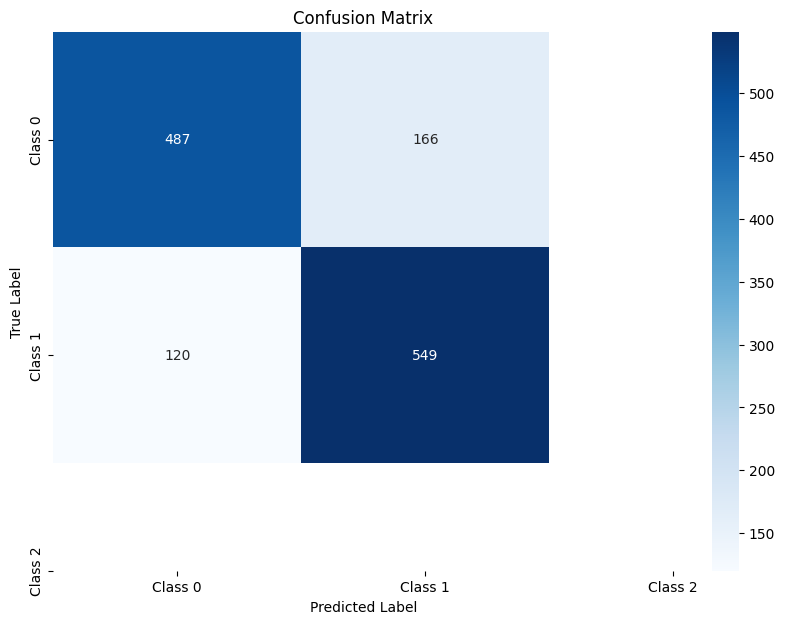

In [22]:

# confusion matrix LR
cm = confusion_matrix(y_test, lr_y_pred)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


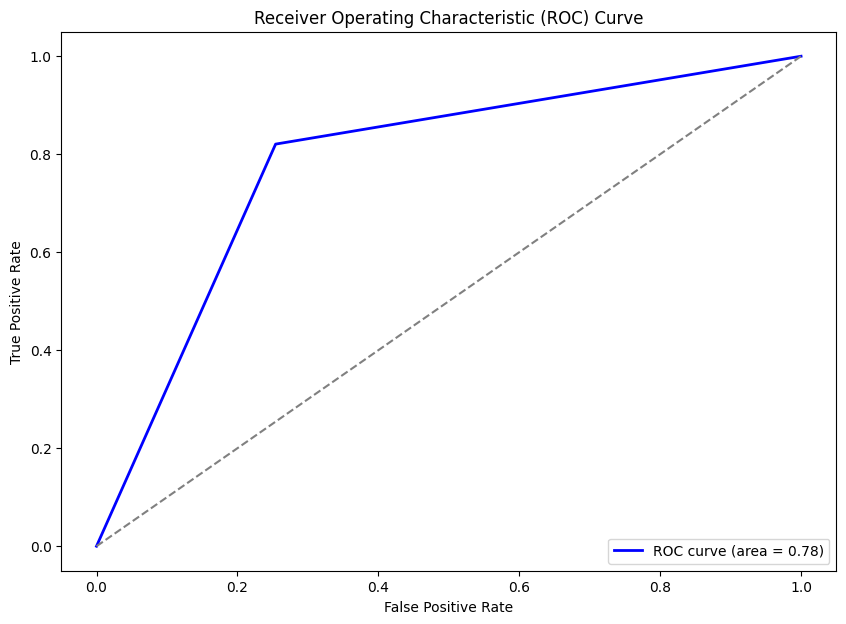

In [23]:
from sklearn.metrics import roc_curve, auc

# ROC curve and ROC area for each class LR
fpr, tpr, _ = roc_curve(y_test, lr_y_pred)
roc_auc = auc(fpr, tpr)

# plot
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Train with Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC

# train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_y_pred = svm_model.predict(X_test)

# SVM model evaluation
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy}')

# classification report
print('\nClassification Report:')
print(classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.5635400907715582

Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.59      0.57       653
        True       0.57      0.54      0.55       669

    accuracy                           0.56      1322
   macro avg       0.56      0.56      0.56      1322
weighted avg       0.56      0.56      0.56      1322



SVM Model Visualization

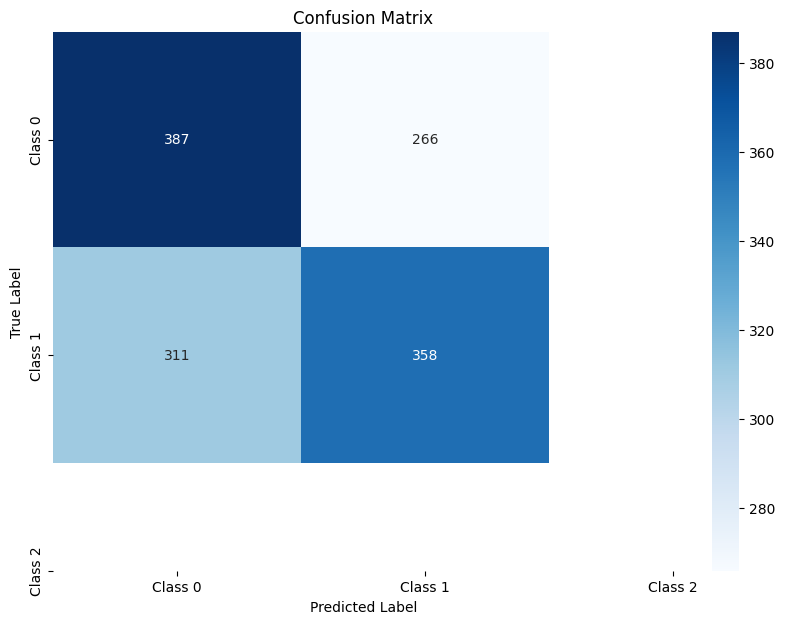

In [25]:
# confusion matrix SVM
cm = confusion_matrix(y_test, svm_y_pred)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


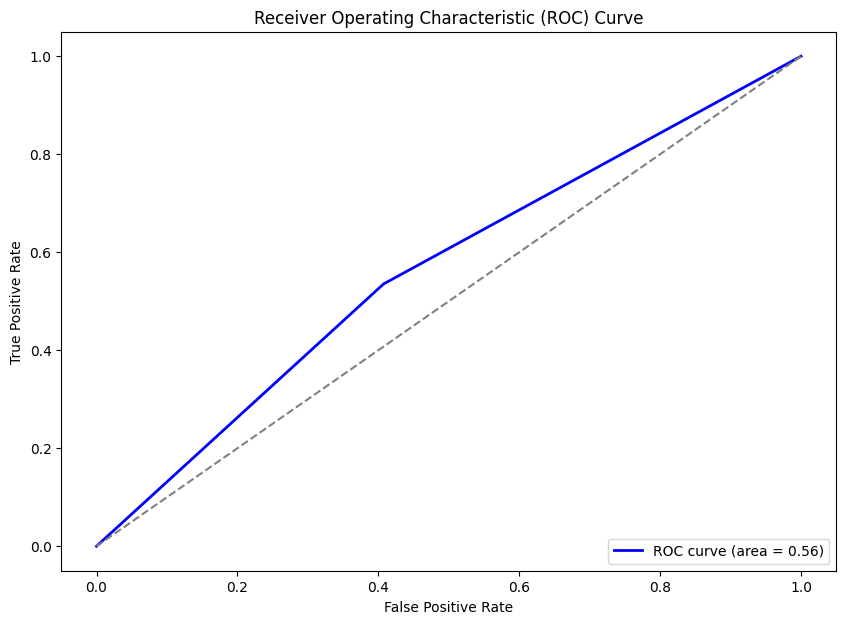

In [26]:
# ROC curve and ROC area for each class SVM
fpr, tpr, _ = roc_curve(y_test, svm_y_pred)
roc_auc = auc(fpr, tpr)

# plot
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Hyperparameter Tuning

To improve the models performance using GridSearchCV for LR and SVM

**For LR**

In [27]:
# define hyperparameters
C_values = [0.01, 0.1, 1, 10]
penalties = ['l1', 'l2']

best_accuracy = 0
best_params = {}

for C in C_values:
    for penalty in penalties:
        lr_model = LogisticRegression(C=C, penalty=penalty, max_iter=1000, solver='liblinear')
        lr_model.fit(X_train, y_train)
        lr_y_pred = lr_model.predict(X_test)
        accuracy = accuracy_score(y_test, lr_y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {
                'C': C,
                'penalty': penalty
            }

print("Parameters for Logistic Regression:", best_params)
print("Accuracy for Logistic Regression:", best_accuracy)


Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1'}
Accuracy for Logistic Regression: 0.7957639939485628
